In [ ]:
library(vars)
library(ggplot2)
library(gridExtra)
library(forecast)

In [ ]:
install.packages('repr')

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



In [ ]:
data(Canada)
data = as.data.frame(Canada)
data$date = seq(as.Date("1980/1/1"), as.Date("2000/12/31"), by = "quarter")

e = ts(data$e, start = c(1980,1), frequency = 4)
prod = ts(data$prod, start = c(1980,1), frequency = 4)
rw = ts(data$rw, start = c(1980,1), frequency = 4)
U = ts(data$U, start = c(1980,1), frequency = 4)

Analiza podataka; varijabli



(1) Varijabla E - varijabla zaposlenosti

In [ ]:
summary(data$e)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  928.6   935.4   946.0   944.3   950.0   961.8 

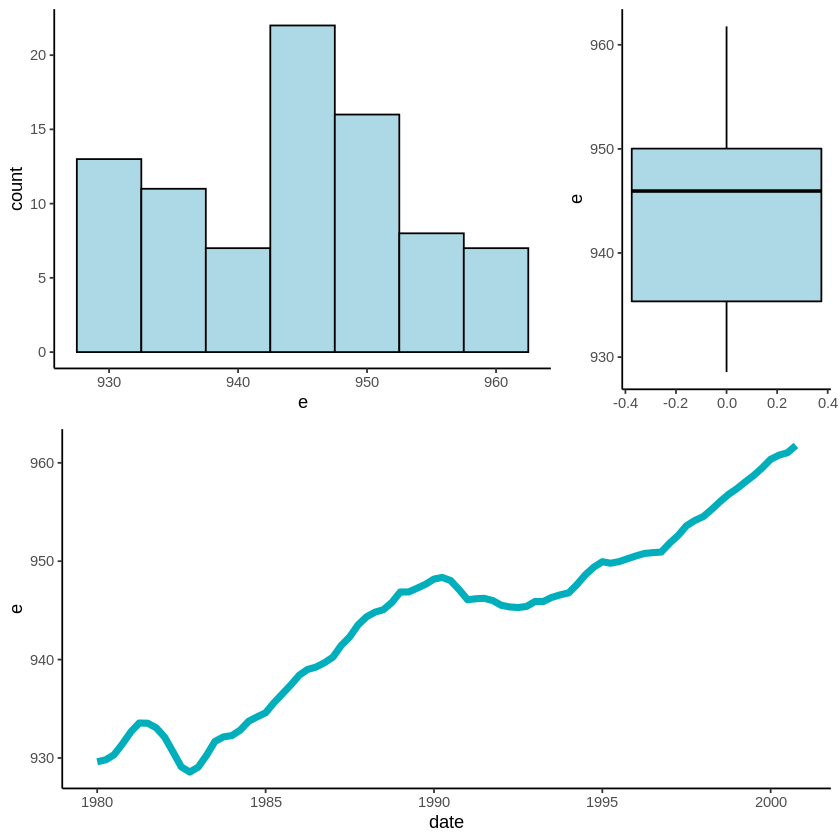

In [ ]:
p1 = ggplot(data, aes(x=e)) +
 geom_histogram(binwidth=5, color="black", fill="lightblue") + 
 theme_classic()

 p2 = ggplot(data, aes(y=e)) + 
  geom_boxplot(color="black", fill="lightblue")+
  theme_classic()

  p3 = ggplot(data = data, aes(x = date, y = e))+
  geom_line(color = "#00AFBB", size = 2)+
  theme_classic()

  grid.arrange(
  p1, p2, p3,
  widths = c(2, 1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 3)))

(2) Varijabla Prod - varijabla mjere produktivnosti rada

In [ ]:
summary(data$prod)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  401.3   404.8   406.5   407.8   410.7   418.0 

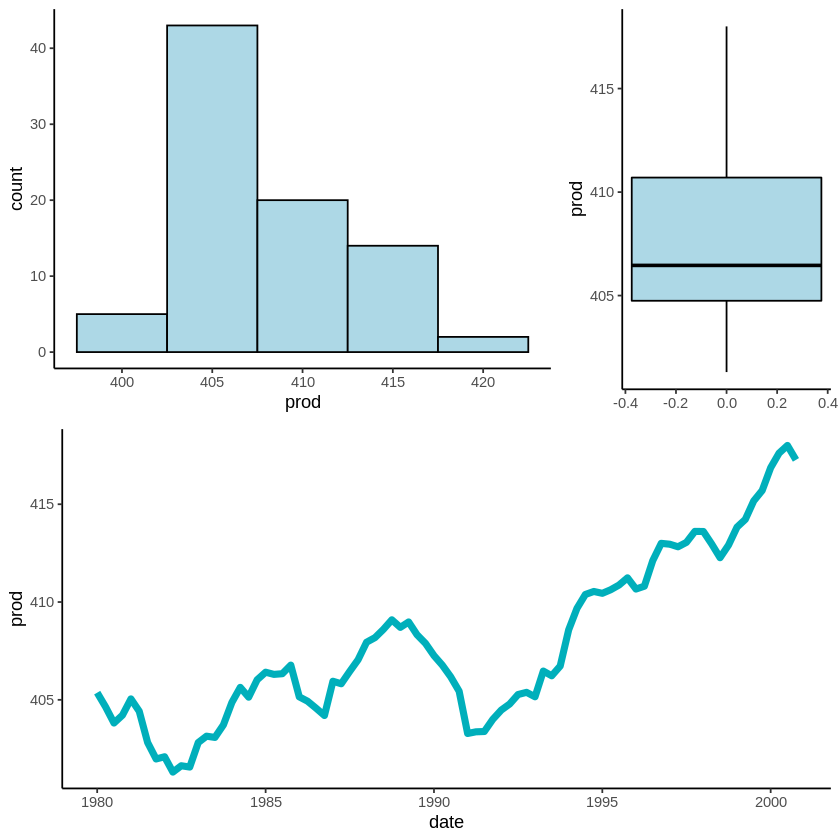

In [ ]:
p1 = ggplot(data, aes(x=prod)) +
 geom_histogram(binwidth=5, color="black", fill="lightblue") + 
 theme_classic()

 p2 = ggplot(data, aes(y=prod)) + 
  geom_boxplot(color="black", fill="lightblue")+
  theme_classic()

  p3 = ggplot(data = data, aes(x = date, y = prod))+
  geom_line(color = "#00AFBB", size = 2)+
  theme_classic()

  grid.arrange(
  p1, p2, p3,
  widths = c(2, 1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 3)))

(3) Varijabla U - stopa nezaposlenosti

In [ ]:
summary(data$U)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  6.700   7.782   9.450   9.321  10.607  12.770 

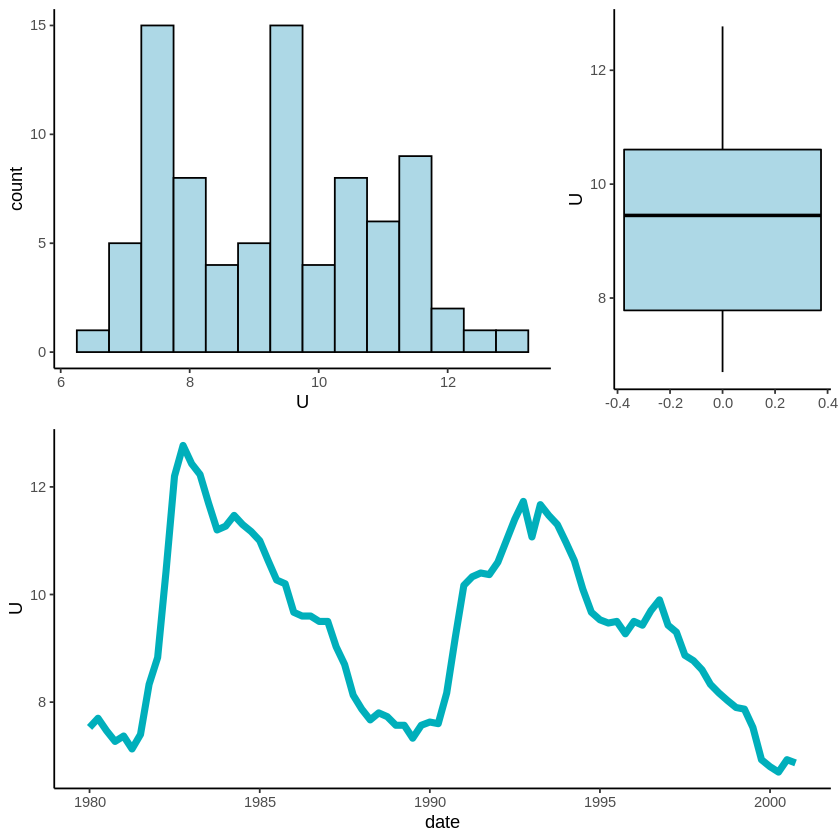

In [ ]:
p1 = ggplot(data, aes(x=U)) +
 geom_histogram(binwidth=0.5, color="black", fill="lightblue") + 
 theme_classic()

 p2 = ggplot(data, aes(y=U)) + 
  geom_boxplot(color="black", fill="lightblue")+
  theme_classic()

  p3 = ggplot(data = data, aes(x = date, y = U))+
  geom_line(color = "#00AFBB", size = 2)+
  theme_classic()

  grid.arrange(
  p1, p2, p3,
  widths = c(2, 1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 3)))

Varijabla RW - realne plaće

In [ ]:
summary(data$rw)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  386.1   423.9   444.4   440.8   461.1   470.0 

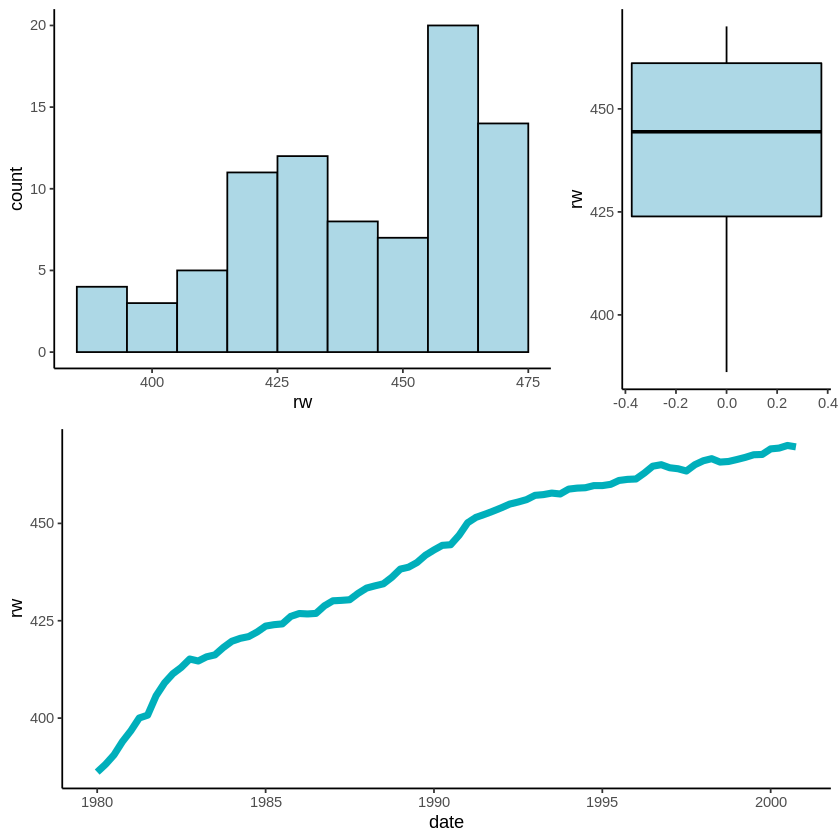

In [ ]:
p1 = ggplot(data, aes(x=rw)) +
 geom_histogram(binwidth=10, color="black", fill="lightblue") + 
 theme_classic()

 p2 = ggplot(data, aes(y=rw)) + 
  geom_boxplot(color="black", fill="lightblue")+
  theme_classic()

  p3 = ggplot(data = data, aes(x = date, y = rw))+
  geom_line(color = "#00AFBB", size = 2)+
  theme_classic()

  grid.arrange(
  p1, p2, p3,
  widths = c(2, 1),
  layout_matrix = rbind(c(1, 2),
                        c(3, 3)))

Modeliranje $VAR(p)\,, p>0$ modelom

Odabir reda $p$:

In [ ]:
VARselect(Canada, lag.max = 4)

,1,2,3,4
AIC(n),-5.70832549,-6.238366753,-6.359392786,-6.119193878
HQ(n),-5.46956983,-5.808606566,-5.738628071,-5.307424635
SC(n),-5.11281884,-5.166454767,-4.811075473,-4.094471239
FPE(n),0.00332039,0.001960529,0.001750655,0.002258874


Kriteriji sugeriraju na $p=2$ i $p=3$. Uzmimo onaj manji.

In [ ]:
model = VAR(Canada, p=2, type = c("none"))

In [ ]:
summary(model)


VAR Estimation Results:
Endogenous variables: e, prod, rw, U 
Deterministic variables: none 
Sample size: 82 
Log Likelihood: -184.045 
Roots of the characteristic polynomial:
    1 0.9783 0.9113 0.9113 0.7474 0.1613 0.1613 0.1572
Call:
VAR(y = Canada, p = 2, type = c("none"))


Estimation results for equation e: 
e = e.l1 + prod.l1 + rw.l1 + U.l1 + e.l2 + prod.l2 + rw.l2 + U.l2 

        Estimate Std. Error t value Pr(>|t|)    
e.l1     1.62047    0.15484  10.466 3.01e-16 ***
prod.l1  0.17973    0.06296   2.855  0.00558 ** 
rw.l1   -0.04426    0.05652  -0.783  0.43616    
U.l1     0.11310    0.19947   0.567  0.57242    
e.l2    -0.64815    0.15208  -4.262 5.89e-05 ***
prod.l2 -0.11683    0.06797  -1.719  0.08983 .  
rw.l2    0.04476    0.05472   0.818  0.41608    
U.l2    -0.06581    0.19725  -0.334  0.73959    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1


Residual standard error: 0.3749 on 74 degrees of freedom
Multiple R-Squared:     1,	Adjusted R-squared:  

Dijagnostika $VAR(2)$ modela:

In [ ]:
arch.test(model)$arch.mul


	ARCH (multivariate)

data:  Residuals of VAR object model
Chi-squared = 541.89, df = 500, p-value = 0.09505


$p$-vrijednost Arch test je $0.09505$ što je veće od $\alpha=0.05$, te nema dokaza o heteroskedastičnosti reziduala, tj. može reziduale smatrati kao bijeli šum. 

In [ ]:
normality.test(model)$jb$JB


	JB-Test (multivariate)

data:  Residuals of VAR object model
Chi-squared = 4.374, df = 8, p-value = 0.8219


$p$-vrijednost JB testa je $0.8219$ što je veće od $\alpha=0.05$, te stoga ne odbacujemo $H_0$, odnosno možemo reziduale smatrati kao visedim. normalna distribucija.

In [ ]:
serial.test(model)$serial


	Portmanteau Test (asymptotic)

data:  Residuals of VAR object model
Chi-squared = 209.62, df = 224, p-value = 0.7463


p -vrijednost Serial testa je  $0.7463$  što je veće od  $\alpha=0.05$ , te stoga ne odbacujemo  $H_0$ , odnosno ne možemo tvrditi da su reziduali korelirani.

Predviđanje:

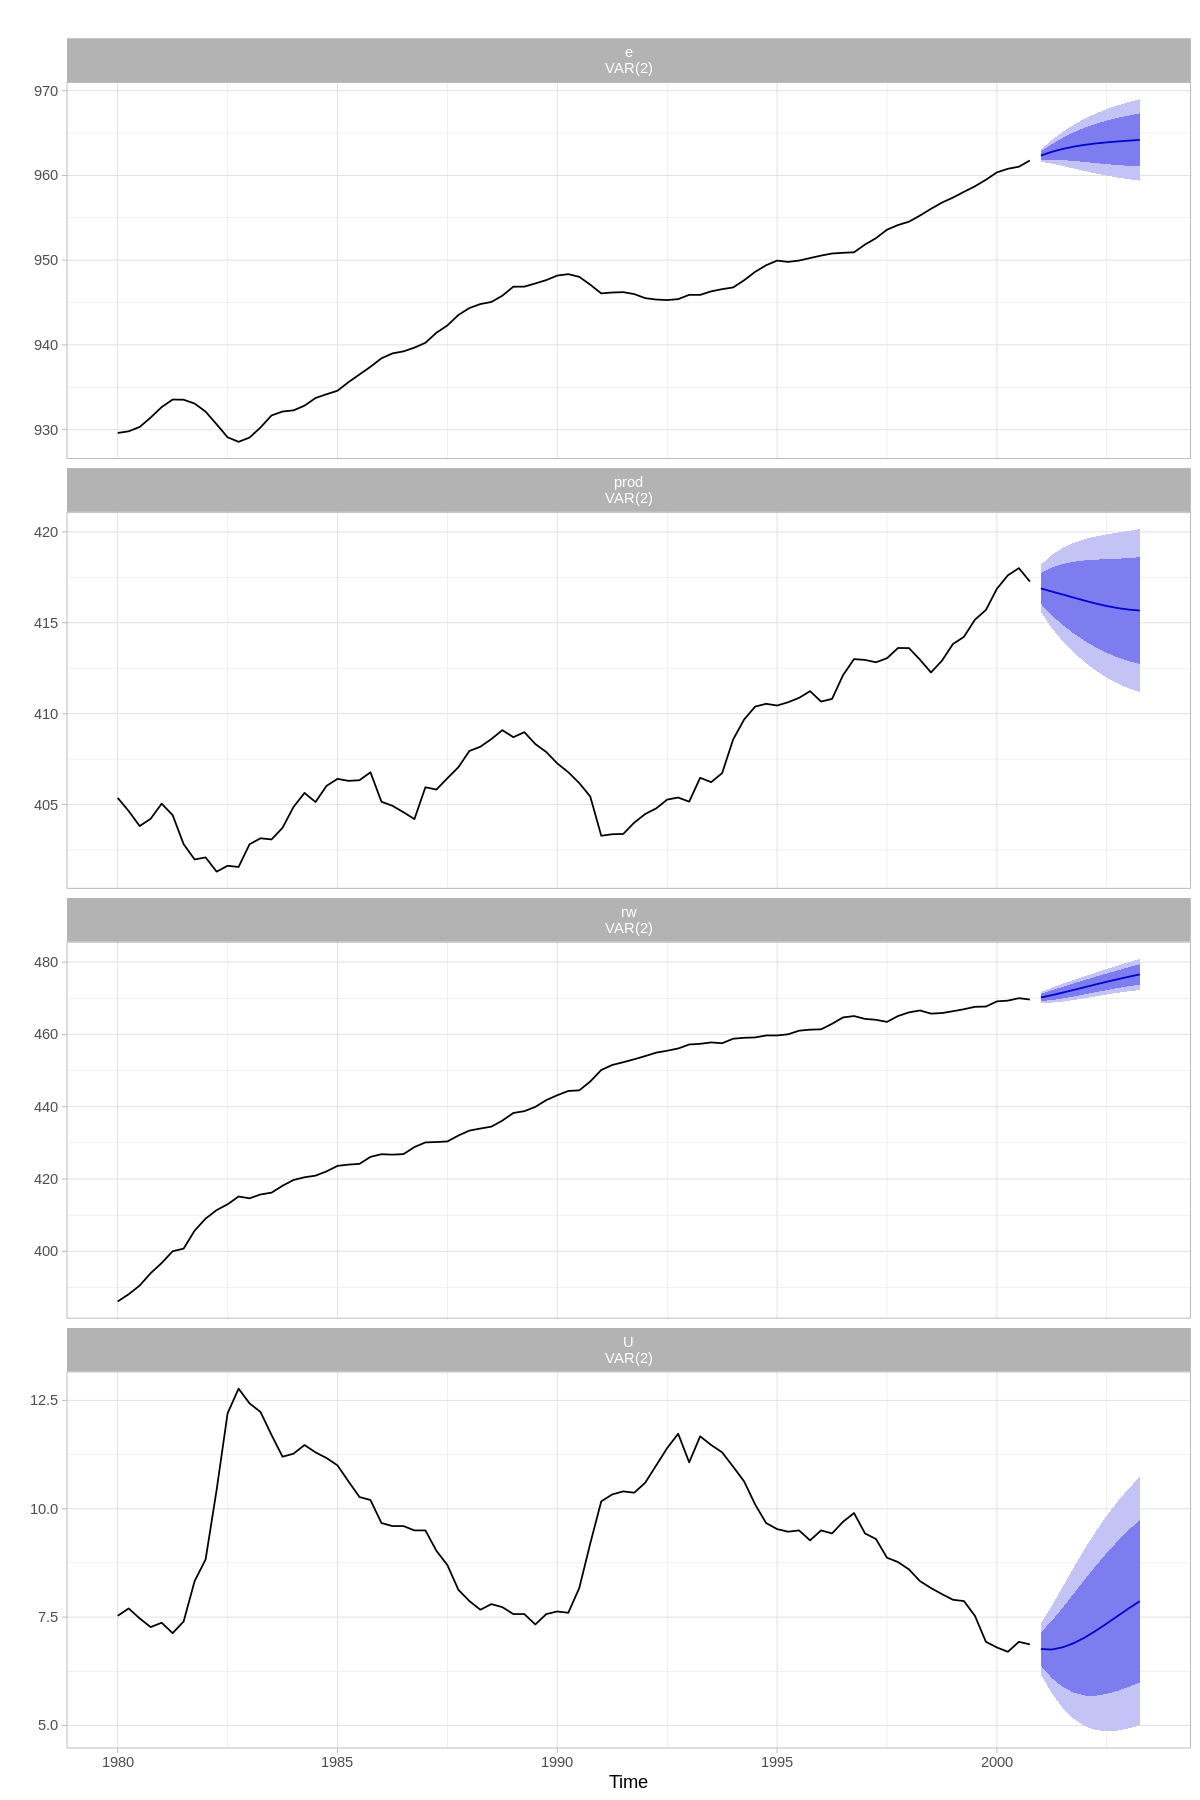

In [ ]:
options(repr.plot.width=10, repr.plot.height=15)
autoplot(forecast(model, h=10)) + theme_light()